In [1]:
import pandas as pd
import numpy as np 
import scipy as sp 
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import re
import seaborn as sns
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# For reading the documentation!

In [2]:
file = open('../UCI_data/heart-disease.names')
f2 = file.read()

In [3]:
#f2.split('\n')

Long beach VA file was taken because it was better to work with. It didn't have unformatted spaces like cleveland.data 
file so this one was chosen. 

In [4]:
file = open('../UCI_data/long-beach-va.data', encoding = "ISO-8859-1")
f = file.read()

data = [x.replace('\n', ' ').split(' ')[1:-1] for x in f.split('name')[:-1]]
#all the rows in our dataset will be split by name since in the document it is mentioned that 
# a dummy variable 'name' is used in place of that of the participants in the study. 
print('The number of columns and rows!', len(data[1]),len(data)) 

The number of columns and rows! 75 200


In [5]:
data = [ [float(a) for a in x] for x in data] # converting from string to float format.
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,1.0,1.0,1.0,-9.0,4.0,140.0,0.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,5.50,NaN
1,2.0,0.0,44.0,1.0,1.0,1.0,1.0,-9.0,4.0,130.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,-9.0
2,3.0,0.0,60.0,1.0,1.0,1.0,1.0,-9.0,4.0,132.0,...,1.0,2.0,1.0,1.0,1.0,1.0,7.0,2.0,0.52,4.1
3,4.0,0.0,55.0,1.0,1.0,1.0,1.0,-9.0,4.0,142.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.73,6.5
4,5.0,0.0,66.0,1.0,1.0,0.0,0.0,-9.0,3.0,110.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.73,8.0


The column number 58 (index 57) is the predicted column i.e. 'num'. <br>
In the dataset description the column 69 (index 68) onwards are not used so we can remove these particular columns. So only till index 67 are needed.

In [6]:
df = df.loc[:, :67]

df.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.0,63.0,1.0,1.0,1.0,1.0,-9.0,4.0,140.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
1,2.0,0.0,44.0,1.0,1.0,1.0,1.0,-9.0,4.0,130.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3.0,0.0,60.0,1.0,1.0,1.0,1.0,-9.0,4.0,132.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0
3,4.0,0.0,55.0,1.0,1.0,1.0,1.0,-9.0,4.0,142.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
4,5.0,0.0,66.0,1.0,1.0,0.0,0.0,-9.0,3.0,110.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# We want to predict 'Beta Blocker' property (Beta blocker used during exercise ECG: 1 = yes; 0 = no). The column index is 23

The attributes we take as our data for the model are: 
    - Age (in years) index 2
    - Gender(sex) index 3
    - Cholestrol level serum cholestoral in mg/dl index 11
    - Number of years as a smoker  years index 14




In [8]:
X = pd.DataFrame({'age': df.iloc[:,2], 'Gender': df.iloc[:,3], 'Cholesterol': df.iloc[:,11],
                  'Num_years_smoke': df.iloc[:, 14], 'Beta_blocker': df.iloc[:,23]})
X.head()

,age,Gender,Cholesterol,Num_years_smoke,Beta_blocker
0,1.0,1.0,0.0,0.0,1.0
1,44.0,1.0,209.0,10.0,0.0
2,60.0,1.0,218.0,40.0,0.0
3,55.0,1.0,228.0,30.0,0.0
4,66.0,1.0,213.0,8.0,1.0


In [9]:
X.isna().any()

age                False
Gender             False
Cholesterol        False
Num_years_smoke    False
Beta_blocker       False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22d7d518>,
      dtype=object)

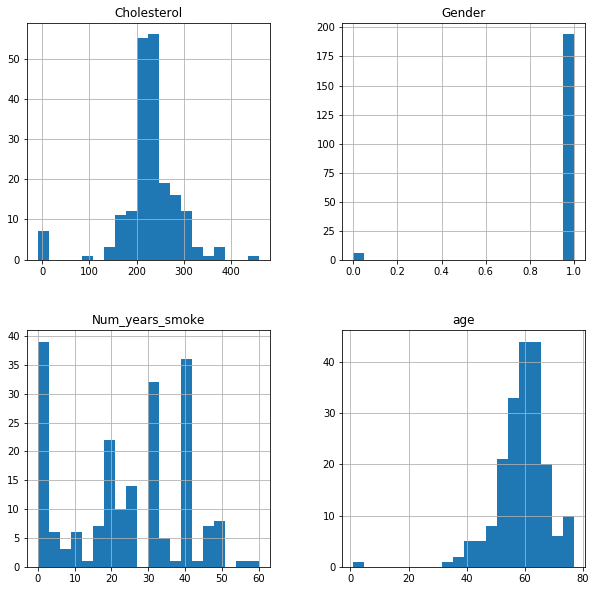

In [29]:
X.hist(figsize = (10,10), bins = 20)

Number of years of smoke == -9 means that the data is not available according to the description. <br>
Age == 0 means that the data is not available according to the description, highly unlikely that the subjects had the age 0. <br> 
Cholestrol == 0 doesn't make sense and is also said to be missing according to the description.  <br> 
Gender == 0 means Female and Gender == 1 means Male. <br> 


In [11]:
print (sum(X['Cholesterol'] == 0), sum(X['Num_years_smoke'] == -9))

50 12


In [12]:
X.Cholesterol.replace(0,np.nan, inplace = True)
X.Num_years_smoke.replace(-9,np.nan, inplace = True)
X.age.replace(0,np.nan, inplace = True)
X.Beta_blocker.replace(-9, np.nan, inplace = True)

In [13]:
X.isna().any()

age                False
Gender             False
Cholesterol         True
Num_years_smoke     True
Beta_blocker        True
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22a2fcf8>,
      dtype=object)

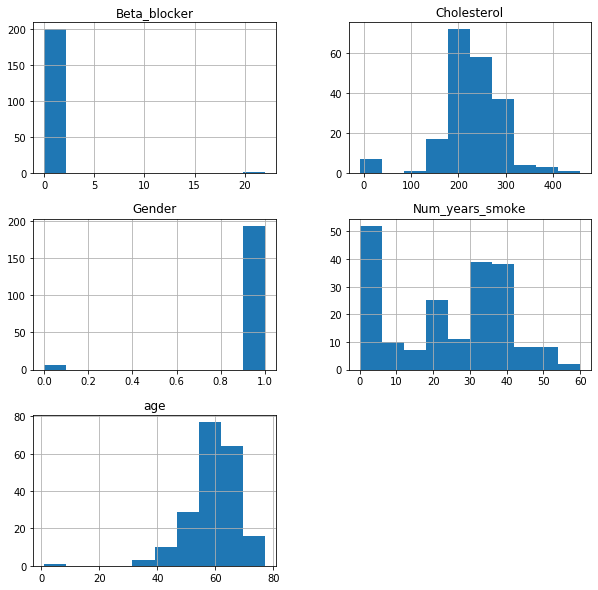

In [14]:
X.interpolate(method = 'nearest', direction = 'both').bfill().hist(figsize = (10,10))

In [15]:
sum(X['Cholesterol']==0)

0

In [16]:
sum(X.Cholesterol.isnull())

50

In [17]:
imp = IterativeImputer(max_iter=10, random_state= 24)
X = imp.fit_transform(X)

In [18]:
X =  pd.DataFrame(X, columns = ['age', 'Gender','Cholesterol', 'Num_years_smoke', 'Beta_blocker'])

In [21]:
X.head()

,age,Gender,Cholesterol,Num_years_smoke,Beta_blocker
0,1.0,1.0,219.162428,0.0,1.0
1,44.0,1.0,209.000000,10.0,0.0
2,60.0,1.0,218.000000,40.0,0.0
3,55.0,1.0,228.000000,30.0,0.0
4,66.0,1.0,213.000000,8.0,1.0


In [24]:
y = X['Beta_blocker']
X = X.drop(columns = 'Beta_blocker')

In [25]:
X.head()

,age,Gender,Cholesterol,Num_years_smoke
0,1.0,1.0,219.162428,0.0
1,44.0,1.0,209.000000,10.0
2,60.0,1.0,218.000000,40.0
3,55.0,1.0,228.000000,30.0
4,66.0,1.0,213.000000,8.0


## We do the thresholding because we want to distinguish between different classes. The logistic regression model can only predict if the y values are not floating point numbers!

In [26]:
y = [0 if num<= 0.5 else 1 for num in y]

Predict confidence scores for samples.

The confidence score for a sample is the signed distance of that sample to the hyperplane.

In [27]:
clf = LogisticRegression(random_state= 98, solver = 'liblinear',
                         multi_class = 'ovr').fit(X, np.array(y).ravel())
clf.predict(X)
clf.predict_proba(X)
print (clf.score(X, y))


0.635
